numFeat: 2
(200,)


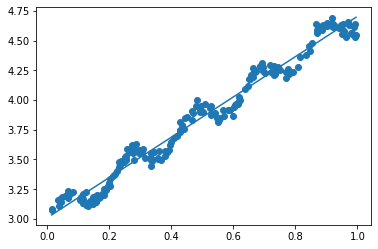

In [2]:
from numpy import *
import matplotlib.pyplot as plt

def loadDataSet(fileName):     
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    print('numFeat:',numFeat)
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

xArr, yArr = loadDataSet('ex0.txt')
ws = standRegres(xArr, yArr)
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
print(xMat[:, 1].flatten().A[0].shape)
xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,1],yHat)

numFeat: 2
(200,)


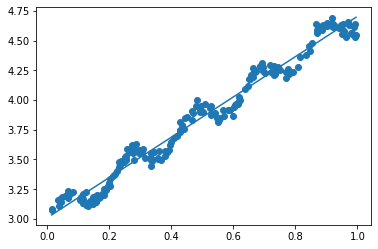

In [27]:
from numpy import *
import matplotlib.pyplot as plt

def loadDataSet(fileName):     
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    print('numFeat:',numFeat)
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegresByScalar(xArr, yArr):
    xArr, yArr= array(xArr), array(yArr)
    sum_xy, sum_xx = sum(xArr*yArr), sum(xArr*xArr)
    xAvg, yAvg = mean(xArr), mean(yArr)

    a = (sum_xy - xArr.shape[0]*xAvg*yAvg)/(sum_xx - xArr.shape[0]*xAvg*xAvg)
    b = yAvg - a*xAvg

    ws = mat([[b], [a]])
    return ws

xArr, yArr = loadDataSet('ex0.txt')

# filter out the redundant data
xList = [x[1] for x in xArr]

ws = standRegresByScalar(xList, yArr)
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
print(xMat[:, 1].flatten().A[0].shape)
xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,1],yHat)